In [98]:
import os
import pandas as pd
import torch 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


In [99]:
def SVM_model_training(X_train,y_train):
    svm_regressor = SVR(kernel='linear')

    # Train the model on the training data
    svm_regressor.fit(X_train, y_train)

    return svm_regressor


In [100]:
def SVM_model_training_tuning(X_train,y_train):
    #definig parameter grid
    param_grid = {
    'C': [0.1, 1, 10, 100, 1000, 10000,10500,20000,30000],  # Adjust values based on your needs
    'epsilon': [0.001,0.002,0.005,0.01, 0.1, 0.2, 0.5, 1, 2]  # Adjust values based on your needs
    }
    # Create an SVR model
    svm_regressor = SVR(kernel='linear')

# Create a GridSearchCV object
    grid_search = GridSearchCV(estimator=svm_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Perform grid search on the training data
    grid_search.fit(X_train, y_train)

# Get the best hyperparameters
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters: {best_params}")

# Get the best model
    best_svm_model = grid_search.best_estimator_
    return best_svm_model

In [101]:

def SVM_model_test(y_test,X_test,svm_regressor):
    y_pred = svm_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("MSE is==",mse)
    print("MAE is==",mae)
    print("r2 is==",r2)
    return y_pred


In [102]:



# df = pd.read_csv('Dataset for Q1.csv')
df = pd.read_csv('../../data/Dataset for Q1.csv')

# drop rows with missing values
df_cleaned = df.dropna()
df=df_cleaned
# print(df.head)
input_vector= df.drop(columns=['Price'])
price_vector = df['Price']
    # print(price_vector)
    # print(input_vector)

scaler = StandardScaler()


# Fit and transform the data(Standardising data with 0 mean and unit variance)
input_vector_scaled = scaler.fit_transform(input_vector)  
input_vector=input_vector_scaled

# print(input_vector)

    
size=len(input_vector)
print(size)
train_ratio=0.9
train_size=int(size*train_ratio)
    


# #Splitting the data in training and testing data 


#Training data
X_train=input_vector[:train_size]
# print(X_train)
y_train=price_vector[:train_size]
    
#Testing data
# global X_test
X_test=input_vector[train_size:]
y_test=price_vector[train_size:]
print(type(y_test))
    
#    return X_train
   

# preprocessing()
# svm_regressor=SVM_model_training(X_train,y_train)
# SVM_model_test(y_test,X_test,svm_regressor)


1000
<class 'pandas.core.series.Series'>


In [103]:
# svm_regressor=SVM_model_training(X_train,y_train)
svm_regressor=SVM_model_training_tuning(X_train,y_train)

y_pred= SVM_model_test(y_test,X_test,svm_regressor)

# Accessing coefficients of the best linear SVM model
coefficients = svm_regressor.coef_
print(f"Coefficients: {coefficients}")

# Accessing dual coefficients of the best SVM model (dual coefficents number depends on the number of data points)
dual_coefficients = svm_regressor.dual_coef_
print(f"Dual Coefficients (w): {dual_coefficients}")


Best Hyperparameters: {'C': 10500, 'epsilon': 0.002}
MSE is== 4286257.407045618
MAE is== 1647.862432027184
r2 is== 0.8377490344892404
Coefficients: [[-3914.98712219 -1935.73380117]]
Dual Coefficients (w): [[ 10500.         -10500.         -10500.         -10500.
  -10500.          10500.          10500.          10500.
  -10500.         -10500.          10500.          10500.
   10500.          10500.         -10500.         -10500.
   10500.         -10500.          10500.         -10500.
  -10500.         -10500.          10500.         -10500.
  -10500.         -10500.          10500.          10500.
   10500.          10500.          10500.          10500.
   10500.         -10500.         -10500.          10500.
   10500.          10500.          10500.          10500.
   10500.          10500.          10500.          10500.
   10500.         -10500.          10500.         -10500.
   10500.         -10500.          10500.          10500.
  -10500.          10500.          10500.

In [104]:
#Relation of input variables with each other (EDA)
input1=[]
input2=[]
input3=[]
output=[]
for i in range(len(X_train)):
    c=X_train[i][0]

    input1.append(c.item())
    c=X_train[i][1]

    input2.append(c.item())
    # c=X_train[i][2]
    # input3.append(c.item())
    c=y_train[i]
    output.append(c.item())


covariance_matrix = np.cov(input1, input2)

# Extract the covariance between the two variables from the covariance matrix


# print("Covariance between input1 and input2:", covariance)

# covariance_matrix1 = np.cov(input1, input3)
# covariance_matrix2 = np.cov(input3, input2)
covariance_matrix3=np.cov(input1, output)
covariance_matrix4=np.cov(input2, output)
# covariance_matrix5=np.cov(input3, output)
covariance = covariance_matrix[0, 1]
# covariance1 = covariance_matrix1[0, 1]
# covariance2 = covariance_matrix2[0, 1]
covariance3 = covariance_matrix3[0, 1]
covariance4 = covariance_matrix4[0, 1]
# covariance5 = covariance_matrix5[0, 1]

#Extracting correlation factor between target and each input
correlation_coefficient1 = np.corrcoef(input1, y_train)[0, 1]
correlation_coefficient2 = np.corrcoef(input2, y_train)[0, 1]
# correlation_coefficient3 = np.corrcoef(input3, y_train)[0, 1]



print("Covariance between X1 and X2:", covariance)
# print("Covariance between X2 and X3:", covariance1)
# print("Covariance between X3 and X1:", covariance2)
print("Covariance between X1 and y:", covariance3)
print("Covariance between X2 and y:", covariance4)
# print("Covariance between X3 and y:", covariance5)

print("---------------------------------------------------")

print(f"Correlation Coefficient between X1 and y: {correlation_coefficient1:.2f}")
print(f"Correlation Coefficient between X2 and y: {correlation_coefficient2:.2f}")
# print(f"Correlation Coefficient between X3 and y: {correlation_coefficient3:.2f}")





Covariance between X1 and X2: -0.00818212684968667
Covariance between X1 and y: -3883.4996910527025
Covariance between X2 and y: -1956.8121303740888
---------------------------------------------------
Correlation Coefficient between X1 and y: -0.81
Correlation Coefficient between X2 and y: -0.41


In [105]:

def create_plot(X,y,z):
   
    feature_to_plot=[]
    list2=[]
    # print(X)
    for i in range(len(X)):
        feature_to_plot.append(i+1)
    # print(y) 
    y_list = y.tolist() 
    # print(z)
    feature_to_plot1 = X[:,0] 
    feature_to_plot2 = X[:,1] 

    # feature_to_plot3 = X[:,2] 
    for i in range(len(y)):
        # list2.append([y[i].item(),z[i].item()])
        # print(y[i])
        list2.append([z[i].item(),y_list[i]])
    # print(list2)
    list2.sort()
    y=[]
    z=[]
    for i in range(len(list2)):
        y.append(list2[i][1])
        z.append(list2[i][0])


    # Create a scatter plotc.ear
   
    plt.scatter(feature_to_plot,y,label='label(y)',alpha=0.5,color='red')

    # # plt.scatter(feature_to_plot3, y, alpha=0.5)  #line plot
    #Creating plot with label and axis name
    plt.plot(feature_to_plot,z,label='prediction(z)',alpha=0.5)
    # plt.plot(y,z,alpha=0.5)
    plt.legend()
    plt.xlabel('Data Point')  # Replace with the appropriate feature name
    plt.ylabel('prediction(z),label(y)')
    plt.title('Prediction(z),label(y) vs. Data Point')
    plt.show()

<class 'numpy.ndarray'>


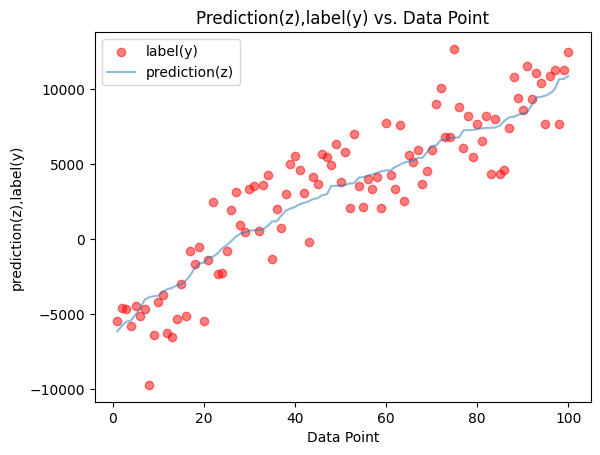

In [106]:
print(type(y_pred))
create_plot(X_test,y_test,y_pred)
